In [1]:
import numpy as np
import scipy as sp
import scgeom as sg
import scanpy as sc
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.stats import spearmanr, pearsonr, entropy

import matplotlib as mpl
plt.rcParams["font.family"] = "arial"
mpl.rcParams['font.size'] = 14

In [2]:
data_name = 'A549_emt_bin_ppt'
result_path = 'scGeom_results/'+data_name+'/'
adata = sc.read('data/'+data_name+'.h5ad')

import os

folder = os.path.exists(result_path)
if not folder:                   #判断是否存在文件夹如果不存在则创建为文件夹
    os.makedirs(result_path)            #makedirs 创建文件时如果路径不存在会创建这个路径

In [3]:
adata

AnnData object with n_obs × n_vars = 2961 × 437
    obs: 'Clusters', '_X', '_Y', 'batch', 'sample', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'palantir_pseudotime', 'palantir_entropy'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'DM_EigenValues', 'neighbors', 'palantir_waypoints', 'pca', 'sample_colors', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'DM_EigenVectors', 'DM_EigenVectors_multiscaled', 'X_pca', 'X_umap', 'palantir_fate_probabilities', 'velocity_pca'
    varm: 'PCs'
    layers: 'MAGIC_imputed_data', 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'DM_Kernel', 'DM_Similarity', 'connectivities', 'distances'

In [4]:
sc.pp.neighbors(adata,metric = 'cosine',n_neighbors=10, use_rep='X')

In [5]:
X_pca = adata.obsm['X_pca']
X_umap = adata.obsm['X_umap']
X_umap = adata.obsm['X_umap']
X_plt = -X_pca[:,0]
Y_plt = X_pca[:,1]
X_min = np.min(X_plt)
X_max = np.max(X_plt)
Y_min = np.min(Y_plt)
Y_max = np.max(Y_plt)
X_len = (X_max-X_min)/5
Y_len = (Y_max-Y_min)/5
wid = min(X_len,Y_len)/30
X_ori = X_min
Y_ori = Y_min

# **Curvature (cell network)**

In [6]:
D = distance_matrix(X_pca[:,:30], X_pca[:,:30])
sg.tl.neighbor_graph(adata, D=D, knn_k=30, weighted=False, graph_name='curvature_graph')

In [7]:
sg.tl.graph_curvature(adata, curvature_method='orc', orc_alpha=0.5, graph_name='curvature_graph')

(np.float64(-6.578298115730286),
 np.float64(6.577063584327698),
 np.float64(-4.678762340545655),
 np.float64(5.646187686920166))

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

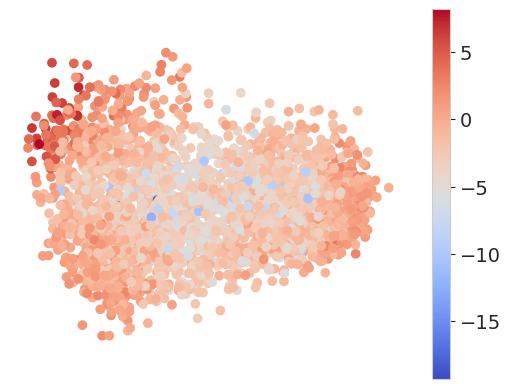

In [8]:
plt.scatter(-X_pca[:,0], X_pca[:,1], c=adata.obs['scgeom-node_curvature'], cmap='coolwarm')
plt.colorbar()
plt.axis('equal')
plt.grid(False)
plt.axis('off')

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'ari

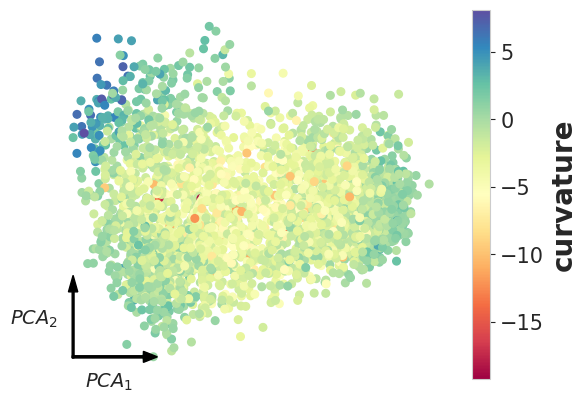

In [9]:
cmap = plt.colormaps['Spectral']
plt.scatter(X_plt,Y_plt,c=adata.obs['scgeom-node_curvature'],s=30,cmap=cmap)
plt.axis('off')

clb=plt.colorbar()
clb.ax.set_ylabel('curvature',fontsize=20,weight='bold')
clb.ax.tick_params(axis='y', labelsize=15)
# plt.savefig(figure_path+'5c1.png',dpi=600,bbox_inches='tight')

plt.arrow(X_ori-wid/2,Y_ori,X_len,0,width=wid,color='black',head_width=5*wid)
plt.arrow(X_ori,Y_ori-wid/2,0,Y_len,width=wid,color='black',head_width=5*wid)
plt.text(X_ori+X_len/2,Y_ori-wid*14,'$PCA_1$',fontsize=14,ha='center',weight='bold')
plt.text(X_ori-wid*21,Y_ori+Y_len/2,'$PCA_2$',fontsize=14,ha='center',weight='bold')

plt.savefig(result_path+'crc_smooth')
plt.show()


# **Topology (cell network)**

In [10]:
adata.obsm['X_pca'] = adata.obsm['X_pca'][:,:30]
sg.tl.cell_network_topology(adata, network_name = 'connectivities', embedding_name = 'X_pca', nb_method = 'knn',
        nb_knn=30, max_filtration = 20, max_dim=1, method = 'lwph', uns_name='diagrams_cell_network_lwph')

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300
2320
2340
2360
2380
2400
2420
2440
2460
2480
2500
2520
2540
2560
2580
2600
2620
2640
2660
2680
2700
2720
2740
2760
2780
2800
2820
2840
2860
2880
2900
2920
2940
2960
Done


In [11]:
from gudhi.wasserstein import wasserstein_distance
from gudhi import bottleneck_distance
def ph_feature_relative_homology_distance(
    adata,
    diagram_name = None,
    max_dim = 1,
    inf_value = 'replace_max',
    ph_distance = 'wasserstein',
    ph_wasserstein_p = 2,
):
    n = adata.shape[0]
    D = np.empty([n,max_dim+1])
    for i in range(n):
        max_filtration = adata.uns[diagram_name]['%s' % i]['max_filtration']
        for j in range(0, max_dim+1):
            dgm_i_rel = adata.uns[diagram_name]['%s' % i]['dgm_h%s' % j]
            dgm_i_base = adata.uns[diagram_name]['%s' % i]['dgm_h%s_base' % j]
            if inf_value == 'replace_max':
                dgm_i_rel[np.where(dgm_i_rel==np.inf)] = max_filtration
                dgm_i_base[np.where(dgm_i_base==np.inf)] = max_filtration
            if ph_distance == 'wasserstein':
                D[i,j] = wasserstein_distance(dgm_i_rel, dgm_i_base, internal_p=ph_wasserstein_p)
            elif ph_distance == 'bottleneck':
                D[i,j] = bottleneck_distance(dgm_i_rel, dgm_i_base)
            elif ph_distance == 'cumulative_length':
                D[i,j] = np.sum(dgm_i_rel[:,1]-dgm_i_rel[:,0]) - np.sum(dgm_i_base[:,1]-dgm_i_base[:,0])
    return D

In [12]:
sg.tl.generate_topology_feature(adata, method='tp', diagram_name='diagrams_cell_network_lwph', feature_name='X_topo_tp',
    inf_value = 'replace_max', dims=[0,1])

In [13]:
sg.tl.generate_topology_feature(adata, method='pe', diagram_name='diagrams_cell_network_lwph', feature_name='X_topo_pe',
    inf_value = 'replace_max', dims=[0,1])

#### **H1 total persistence of local weighted persistent homology (lwph)**

(np.float64(-6.578298115730286),
 np.float64(6.577063584327698),
 np.float64(-4.678762340545655),
 np.float64(5.646187686920166))

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

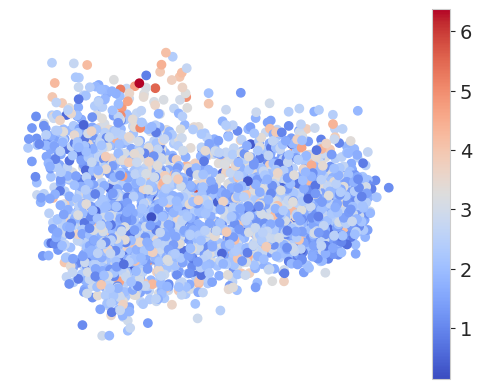

In [14]:
plt.scatter(-X_pca[:,0], X_pca[:,1], c=adata.obsm['X_topo_tp'][:,1], cmap='coolwarm')
plt.colorbar()
plt.grid(False)
plt.axis('equal')
plt.axis('off')

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

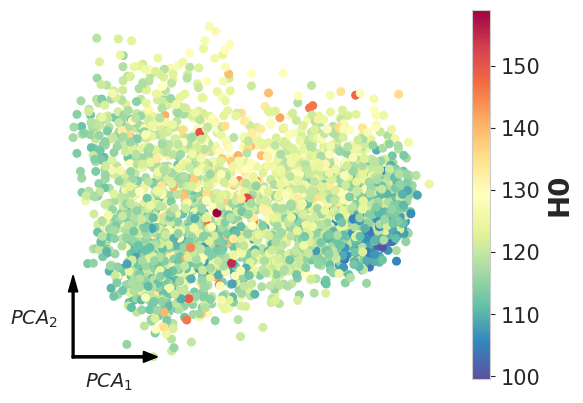

In [15]:
cmap = plt.colormaps['Spectral_r']
plt.scatter(X_plt,Y_plt,c=adata.obsm['X_topo_tp'][:,0],s=30,cmap=cmap)
plt.axis('off')

clb=plt.colorbar()
clb.ax.set_ylabel('H0',fontsize=20,weight='bold')
clb.ax.tick_params(axis='y', labelsize=15)
# plt.savefig(figure_path+'5c1.png',dpi=600,bbox_inches='tight')

plt.arrow(X_ori-wid/2,Y_ori,X_len,0,width=wid,color='black',head_width=5*wid)
plt.arrow(X_ori,Y_ori-wid/2,0,Y_len,width=wid,color='black',head_width=5*wid)
plt.text(X_ori+X_len/2,Y_ori-wid*14,'$PCA_1$',fontsize=14,ha='center',weight='bold')
plt.text(X_ori-wid*21,Y_ori+Y_len/2,'$PCA_2$',fontsize=14,ha='center',weight='bold')

plt.savefig(result_path+'H0 total persistence')
plt.show()

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

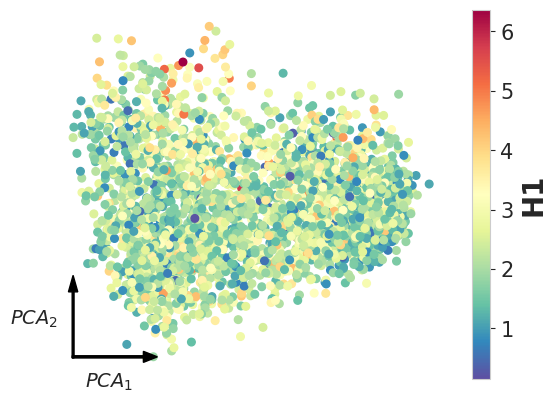

In [16]:
cmap = plt.colormaps['Spectral_r']
plt.scatter(X_plt,Y_plt,c=adata.obsm['X_topo_tp'][:,1],s=30,cmap=cmap)
plt.axis('off')

clb=plt.colorbar()
clb.ax.set_ylabel('H1',fontsize=20,weight='bold')
clb.ax.tick_params(axis='y', labelsize=15)
# plt.savefig(figure_path+'5c1.png',dpi=600,bbox_inches='tight')

plt.arrow(X_ori-wid/2,Y_ori,X_len,0,width=wid,color='black',head_width=5*wid)
plt.arrow(X_ori,Y_ori-wid/2,0,Y_len,width=wid,color='black',head_width=5*wid)
plt.text(X_ori+X_len/2,Y_ori-wid*14,'$PCA_1$',fontsize=14,ha='center',weight='bold')
plt.text(X_ori-wid*21,Y_ori+Y_len/2,'$PCA_2$',fontsize=14,ha='center',weight='bold')

plt.savefig(result_path+'H1 total persistence')
plt.show()

#### **H0 persistence entropy of local weighted persistent homology (lwph)**

(np.float64(-6.578298115730286),
 np.float64(6.577063584327698),
 np.float64(-4.678762340545655),
 np.float64(5.646187686920166))

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

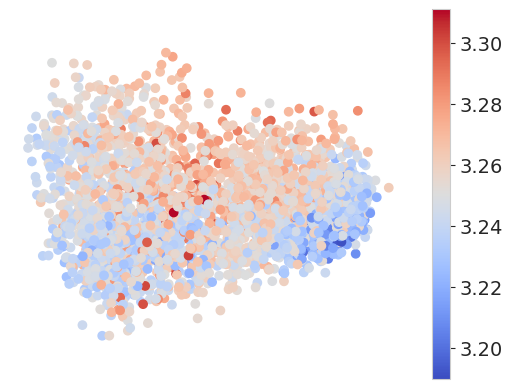

In [17]:
plt.scatter(-X_pca[:,0], X_pca[:,1], c=adata.obsm['X_topo_pe'][:,0], cmap='coolwarm')
plt.colorbar()
plt.grid(False)
plt.axis('off')
plt.axis('equal')

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

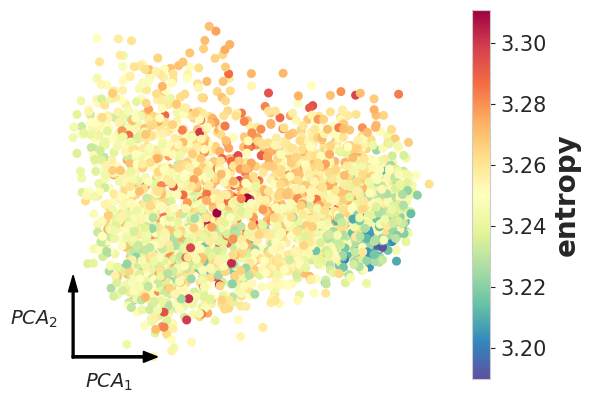

In [18]:
cmap = plt.colormaps['Spectral_r']
plt.scatter(X_plt,Y_plt,c=adata.obsm['X_topo_pe'][:,0],s=30,cmap=cmap)
plt.axis('off')

clb=plt.colorbar()
clb.ax.set_ylabel('entropy',fontsize=20,weight='bold')
clb.ax.tick_params(axis='y', labelsize=15)
# plt.savefig(figure_path+'5c1.png',dpi=600,bbox_inches='tight')

plt.arrow(X_ori-wid/2,Y_ori,X_len,0,width=wid,color='black',head_width=5*wid)
plt.arrow(X_ori,Y_ori-wid/2,0,Y_len,width=wid,color='black',head_width=5*wid)
plt.text(X_ori+X_len/2,Y_ori-wid*14,'$PCA_1$',fontsize=14,ha='center',weight='bold')
plt.text(X_ori-wid*21,Y_ori+Y_len/2,'$PCA_2$',fontsize=14,ha='center',weight='bold')

plt.savefig(result_path+'H0 persistent entropy')
plt.show()

#### **2-Wasserstein distance between H1 relative persistence diagram and H1 normal persistence diagram for relativa local persistent homology (rlph)**

(np.float64(-9.341677141189574),
 np.float64(4.855664682388306),
 np.float64(-8.514156472682952),
 np.float64(1.5307358622550964))

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

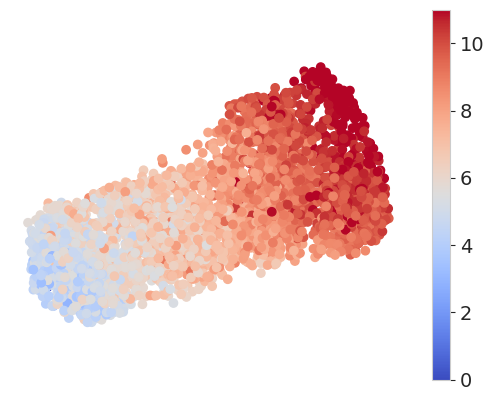

In [19]:
plt.scatter(X_umap[:,0], X_umap[:,1], c=D[:,1], cmap='coolwarm',vmax=np.quantile(D[:,1], 0.95))
plt.colorbar()
plt.grid(False)
plt.axis('equal')
plt.axis('off')

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

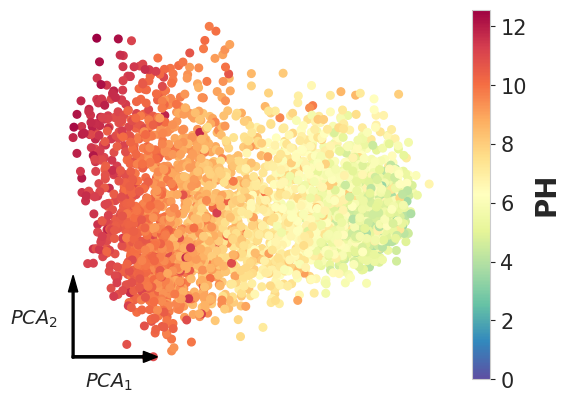

In [20]:
cmap = plt.colormaps['Spectral_r']
plt.scatter(X_plt,Y_plt,c=D[:,1],s=30,cmap=cmap)
plt.axis('off')

clb=plt.colorbar()
clb.ax.set_ylabel('PH',fontsize=20,weight='bold')
clb.ax.tick_params(axis='y', labelsize=15)
# plt.savefig(figure_path+'5c1.png',dpi=600,bbox_inches='tight')

plt.arrow(X_ori-wid/2,Y_ori,X_len,0,width=wid,color='black',head_width=5*wid)
plt.arrow(X_ori,Y_ori-wid/2,0,Y_len,width=wid,color='black',head_width=5*wid)
plt.text(X_ori+X_len/2,Y_ori-wid*14,'$PCA_1$',fontsize=14,ha='center',weight='bold')
plt.text(X_ori-wid*21,Y_ori+Y_len/2,'$PCA_2$',fontsize=14,ha='center',weight='bold')

plt.savefig(result_path+'relative PH')
plt.show()